# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis
In this part, we will generate an indexed image representing connected components in `conveyor_f101.png` image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

### Q1
1. Open the `hexnut_template.png`, `squarenut_template.png` and `conveyor_f100.png` and display. This is done for you.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

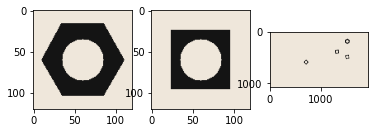

In [3]:
hexnut_template = cv.imread('assets/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('assets/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### Q2
2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See [https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

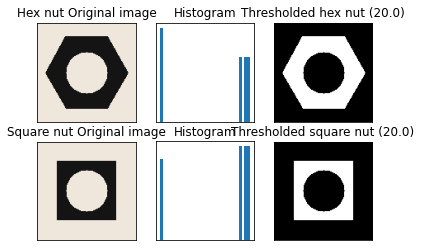

In [4]:
hex_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squ_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
ret_hex, th_hex = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ret_squ, th_squ = cv.threshold(squ_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
# inverted because to detect contours, the object should be white in a black background

images = [
    hexnut_template, 0, th_hex,
    squarenut_template, 0, th_squ
]

titles = [
    "Hex nut Original image", "Histogram", f"Thresholded hex nut ({ret_hex})",
    "Square nut Original image", "Histogram", f"Thresholded square nut ({ret_squ})",
]

for i in range(2):
    plt.subplot(2,3,i*3+1), plt.imshow(cv.cvtColor(images[i*3], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,3,i*3+2), plt.hist(images[i*3].ravel(), 35)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,3,i*3+3), plt.imshow(cv.cvtColor(images[i*3+2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])


### Q3
3. Carry out morphological closing to remove small holes inside the foreground. Use a `3×3` kernel. See [https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) for a guide.

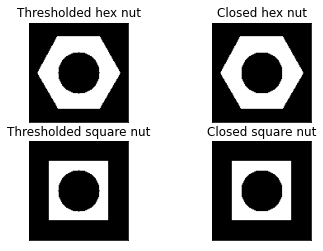

In [5]:
kernel = np.ones((3,3),np.uint8)
closed_hex = cv.morphologyEx(th_hex, cv.MORPH_CLOSE, kernel)
closed_squ = cv.morphologyEx(th_squ, cv.MORPH_CLOSE, kernel)

images = [
    th_hex, closed_hex,
    th_squ, closed_squ
]
titles = [
    "Thresholded hex nut", "Closed hex nut",
    "Thresholded square nut", "Closed square nut"
]

for i in range(2):
    plt.subplot(2,2,i*2+1), plt.imshow(cv.cvtColor(images[i*2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,i*2+2), plt.imshow(cv.cvtColor(images[i*2+1], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2+1]), plt.xticks([]), plt.yticks([])

### Q4
4. Connected components analysis: apply the connectedComponentsWithStats function (see [https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f](https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)) and display the outputs as colormapped images. Answer the following questions
* How many connected components are detected in each image?
* What are the statistics? Interpret these statistics.
* What are the centroids?\
For the hexnut template, you should get the object area in pixel as approximately `4728`.

In [6]:

retval_hex, labels_hex, stats_hex, centroids_hex = cv.connectedComponentsWithStats(closed_hex)
retval_squ, labels_squ, stats_squ, centroids_squ = cv.connectedComponentsWithStats(closed_squ)

print(f"Number of components in the hex nut: {retval_hex}")
print(f"Number of components in the square nut: {retval_squ}")

Number of components in the hex nut: 2
Number of components in the square nut: 2


In [7]:
centroids_hex

array([[59.33684864, 59.63513234],
       [59.83375635, 59.22356176]])

In [8]:
stats_hex

array([[   0,    0,  120,  120, 9672],
       [  10,   16,  101,   88, 4728]], dtype=int32)

#### Statistics
Statistics are the statistics related to each connected component of the relevant image. All the statistics are given in pixels\
Each stistic array has the following data
1. x position of the leftmost pixel
2. y position of the topmost pixel
3. width
4. height
5. area


#### Centroids
Centroids are the centers of each connected components of the relevant image
$$
x_{label}=\frac{\sum{{pixel.x}\ [where\ pixel.label=label]}}{area}\\
y_{label}=\frac{\sum{{pixel.y}\ [where\ pixel.label=label]}}{area}
$$

### Q5
5. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see [https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html](https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html) for help and [https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) for information.

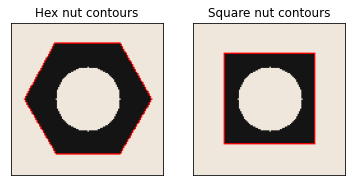

In [9]:
hex_contours, _	=	cv.findContours(closed_hex, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
squ_contours, _	=	cv.findContours(closed_squ, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)

hex_cont_img = hexnut_template.copy()
squ_cont_img = squarenut_template.copy()

cv.drawContours(hex_cont_img, hex_contours, 0, (0,0,255), 1)
cv.drawContours(squ_cont_img, squ_contours, 0, (0,0,255), 1)

images = ( hex_cont_img, squ_cont_img )
titles = ("Hex nut contours", "Square nut contours")

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
plt.show()

## Detecting Objects on a Synthetic Conveyor
In this section, we will use the synthetic `conveyor.mp4` sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('assets/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (1080, 1920), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    # changed the aspect ratio
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in [https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html](https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html) to match contours in each frame with that in th template.

Number of hex nuts: 1


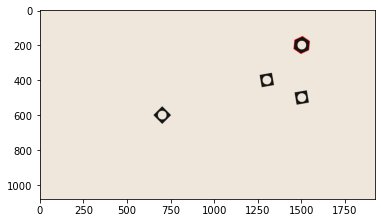

In [11]:
belt = cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)
belt_gray = cv.cvtColor(belt, cv.COLOR_BGR2GRAY)
ret_belt, th_belt = cv.threshold(belt_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
closed_belt = cv.morphologyEx(th_belt, cv.MORPH_CLOSE, kernel)
belt_contours, belt_hierarchy = cv.findContours(closed_belt,2,1)

belt_disp = belt.copy()
err_thresh = 1e-4
detected_count = 0
for i in range(len(belt_contours)):
    ret = cv.matchShapes(hex_contours[0],belt_contours[i],1,0.0)
    if ret < err_thresh:
        cv.drawContours(belt_disp, belt_contours, 6, (0,0,255), 2)
        detected_count += 1

plt.imshow(cv.cvtColor(belt_disp, cv.COLOR_BGR2RGB))
print(f"Number of hex nuts: {detected_count}")
plt.show()

3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames `conveyor_f100.png` and `conveyor_f101.png`. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [17]:
import os, ffmpeg
def compress_video(video_full_path, output_file_name, target_size):
    # Reference: https://en.wikipedia.org/wiki/Bit_rate#Encoding_bit_rate
    min_audio_bitrate = 32000
    max_audio_bitrate = 256000

    probe = ffmpeg.probe(video_full_path)
    # Video duration, in s.
    duration = float(probe['format']['duration'])
    # Audio bitrate, in bps.
    # Target total bitrate, in bps.
    video_bitrate = (target_size * 1024 * 8) / (1.073741824 * duration)

    i = ffmpeg.input(video_full_path)
    ffmpeg.output(i, os.devnull,
                  **{'c:v': 'libx264', 'b:v': video_bitrate, 'pass': 1, 'f': 'mp4'}
                  ).overwrite_output().run()
    ffmpeg.output(i, output_file_name,
                  **{'c:v': 'libx264', 'b:v': video_bitrate, 'pass': 2, 'c:a': 'aac'}
                  ).overwrite_output().run()

In [15]:
# # Yor code here.
def getContours(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret_img, th_img = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    closed_img = cv.morphologyEx(th_img, cv.MORPH_CLOSE, kernel)
    img_contours, img_hierarchy = cv.findContours(closed_img,2,1)
    return img_contours

def filterHexNuts(contours, hex_contour=hex_contours[0], err_thresh=1e-4):
    filtered_hex_contours = []
    for i in range(len(contours)):
        ret = cv.matchShapes(hex_contour,contours[i],1,0.0)
        if ret < err_thresh:
            filtered_hex_contours.append(contours[i])
    return filtered_hex_contours

def getContourCenter(contour):
    cords = np.average(contour, axis=0)
    return cords[0][0], cords[0][1]

contoursInFrame = []
nutCount = 0
def resetContourFlags():
    global contoursInFrame
    for cord in contoursInFrame:
        cord["updated"] = False

def wasContourInFrame(contour, xtolerance=110, ytolerance=10):
    global contoursInFrame, nutCount

    x, y = getContourCenter(contour)
    for cord in contoursInFrame:
        if cord["x"] - x < xtolerance and cord["y"] - y < ytolerance:
            cord["updated"] = True
            cord["x"] = x
            cord["y"] = y
            return True
          
    nutCount += 1
    contoursInFrame.append({"x":x, "y":y, "updated":True})
    return False

def cleanContoursInFrame():
    global contoursInFrame
    for cord in contoursInFrame:
        if not cord["updated"]:
            contoursInFrame.remove(cord)

frame_array = []
shape = (1080, 1920, 3)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('assets/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frameText = 'Frame: ' + str(f)
    totalNutText = "Total hex nuts: " + str(nutCount)
    currentNutCount = len(contoursInFrame)
    currentNutText = "Number of visible nuts: " + str(currentNutCount)

    cv.putText(frame,frameText , (10, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    cv.putText(frame,totalNutText , (10, 80), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    cv.putText(frame,currentNutText , (10, 110), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    
    contours = getContours(frame)
    hexs = filterHexNuts(contours)
    cv.drawContours(frame, hexs, -1, (0,0,255), 8)
    
    resetContourFlags()
    for hex_cont in hexs:
        wasContourInFrame(hex_cont)
    cleanContoursInFrame()

    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()

size = (shape[1], shape[0])
out = cv.VideoWriter('exports/uncompressed_conveyor_result_190456K.mp4',cv.VideoWriter_fourcc(*'h264'), 30, size)
for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()

cv.destroyAllWindows()

compress_video('exports/uncompressed_conveyor_result_190456K.mp4', 'exports/conveyor_result_190456K.mp4', 5 * 1000)

Can't receive frame (stream end?). Exiting.
